In [1]:
import os 
import cv2
import numpy as np
import tensorflow.keras as K
from geopy.distance import geodesic

In [2]:
images=[]
dir="/content/train"
for i in os.listdir(dir):
  images.append(cv2.imread(fr"{dir}/{i}"))

In [3]:
#I will create virtual latitude and longitude(target)
reference_location = (40.7128, -74.0060)
latitude_longitude=[]
for i in range(len(images)):
  latitude=np.random.uniform(-90,90)
  longitude=np.random.uniform(-180,180)

  latitude_longitude.append((latitude,longitude))
#save the values
file = open("latitude_longitude.txt", "w")
for j in range(len(latitude_longitude)):
  file.write(f"{latitude_longitude[j]}"+"\n")
file.close()



In [4]:
#Convert latitude and longitude into distances to be applicable to the regression
distances = [geodesic(reference_location, point).kilometers for point in latitude_longitude]

In [5]:
model=K.Sequential()
model.add(K.layers.BatchNormalization(input_shape=(1500,1500,3)))

model.add(K.layers.Conv2D(64,(6,6),strides=(2,2),padding="valid",activation="relu"))
model.add(K.layers.BatchNormalization())
model.add(K.layers.GaussianDropout(0.2))

model.add(K.layers.Conv2D(64,(6,6),strides=(2,2),padding="valid",activation="relu"))
model.add(K.layers.BatchNormalization())
model.add(K.layers.GaussianDropout(0.2))

model.add(K.layers.Conv2D(64,(6,6),strides=(2,2),padding="valid",activation="relu"))
model.add(K.layers.BatchNormalization())
model.add(K.layers.GaussianDropout(0.2))

model.add(K.layers.Flatten())

model.add(K.layers.Dense(128,activation="relu"))
model.add(K.layers.BatchNormalization())
model.add(K.layers.GaussianDropout(0.2))

model.add(K.layers.Dense(1,))

In [6]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [13]:

his=model.fit(np.array(images),np.array(distances),epochs=200,validation_split=0.1,batch_size=8)

Epoch 1/200
16/16 [==============================] - 13s 824ms/step - loss: 52654368.0000 - mae: 6973.5728 - val_loss: 64172492.0000 - val_mae: 7045.3003
Epoch 2/200
16/16 [==============================] - 13s 834ms/step - loss: 52043276.0000 - mae: 6934.5293 - val_loss: 62876660.0000 - val_mae: 6970.3013
Epoch 3/200
16/16 [==============================] - 13s 824ms/step - loss: 51929348.0000 - mae: 6943.4937 - val_loss: 62474240.0000 - val_mae: 6947.3696
Epoch 4/200
16/16 [==============================] - 13s 783ms/step - loss: 51650428.0000 - mae: 6896.0874 - val_loss: 62616024.0000 - val_mae: 6942.8540
Epoch 5/200
16/16 [==============================] - 12s 773ms/step - loss: 50759840.0000 - mae: 6889.0010 - val_loss: 63359328.0000 - val_mae: 6995.0166
Epoch 6/200
16/16 [==============================] - 12s 775ms/step - loss: 51804640.0000 - mae: 6855.2852 - val_loss: 62840524.0000 - val_mae: 6964.5537
Epoch 7/200
16/16 [==============================] - 13s 781ms/step - loss: 

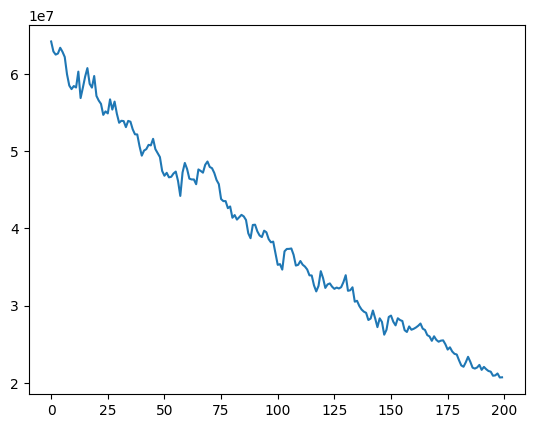

In [14]:
import matplotlib.pyplot as plt
plt.plot(his.history["val_loss"])
plt.show()

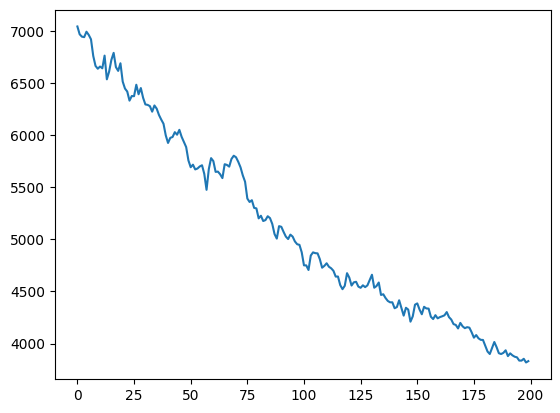

In [15]:
plt.plot(his.history["val_mae"])
plt.show()

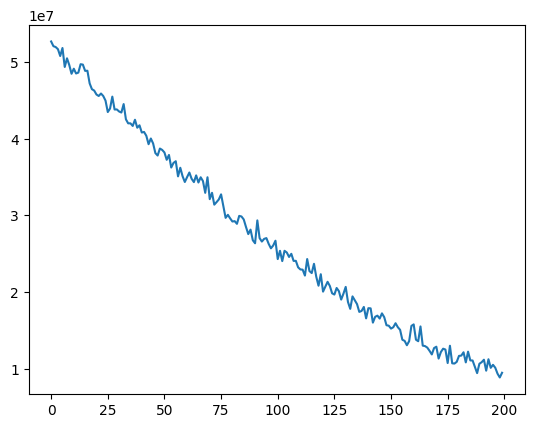

In [16]:
plt.plot(his.history["loss"])
plt.show()

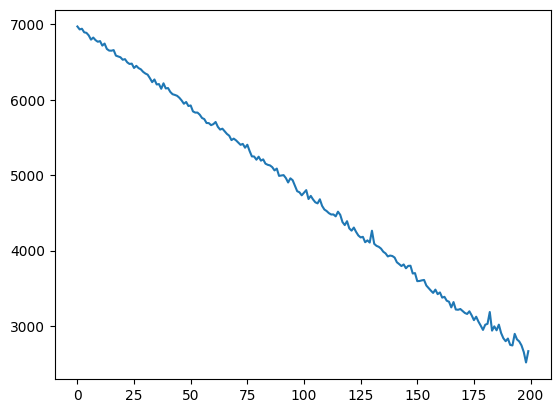

In [17]:
plt.plot(his.history["mae"])
plt.show()

In [18]:
model.save('my_model.h5')